# Data

In [7]:
# First we import all the needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Now we import the data
final = pd.read_csv('C:\\Users\\Rida\\Downloads\\df_normalized_pos.csv')
final

,day_of_week,scheduled_time,block,is_layover,Temperature,Target,direction_id,stop_sequence,geo_nodes,minimum_clearance,segment_length,hausdorff_distance,station_n,stop_order_n,vehicle_num_n,route_n,x_start,x_end,y_start,y_end
0,7,43680,7,1,28.0,1,1.0,48.0,7.0,0.000160,0.003806,0.001549,35,264,13,45,0.594825,0.594057,0.381787,0.383844
1,7,58800,4,1,34.0,1,1.0,67.0,8.0,0.000048,0.002493,0.001169,3,63,5,44,0.608235,0.608011,0.365812,0.367187
2,2,54000,2,1,63.0,1,1.0,39.0,13.0,0.000291,0.010379,0.002455,14,578,117,49,0.680762,0.680995,0.386218,0.389967
3,3,28800,2,0,52.0,1,1.0,45.0,10.0,0.000062,0.005435,0.001891,0,187,131,42,0.651421,0.652200,0.303161,0.305325
4,4,83400,1,1,48.0,1,1.0,50.0,10.0,0.000020,0.002341,0.001007,3,1140,369,26,0.608265,0.608197,0.365392,0.366801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,5,31320,4,0,35.0,0,1.0,37.0,6.0,0.000229,0.005799,0.002456,52,137,11,63,0.506358,0.507465,0.266434,0.269309
39996,4,28800,4,0,32.0,0,1.0,35.0,6.0,0.000096,0.002027,0.000969,11,178,274,31,0.585266,0.586172,0.200087,0.201055
39997,1,34020,3,0,52.0,0,1.0,50.0,10.0,0.000030,0.001676,0.000808,2,244,314,17,0.605522,0.605392,0.274248,0.275188
39998,3,73980,1,0,42.0,0,1.0,39.0,8.0,0.000204,0.005745,0.002132,47,904,316,59,0.538084,0.538775,0.171248,0.173588


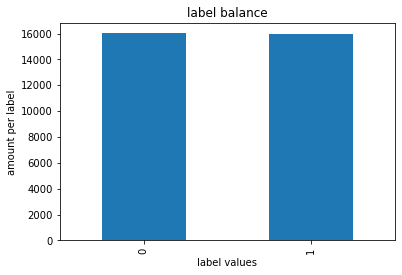

In [4]:
#subsetting the columns
X=final[['day_of_week', 'scheduled_time', 'block', 'is_layover', 'Temperature',
        'direction_id', 'stop_sequence', 'geo_nodes',
       'minimum_clearance', 'segment_length', 'hausdorff_distance',
       'station_n', 'stop_order_n', 'vehicle_num_n', 'route_n', 'x_start',
       'x_end', 'y_start', 'y_end']]
#setting target variable
y = final.Target

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=42) #80% Training, 20% Testing)

# Plotting the target columns
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')

plt.show()

# Logistic Regression

In [13]:
#training the model
lr_model = LogisticRegression(C=1000.0, random_state=0)
lr_model.fit(X_train, y_train)

#Predict
y_pred= lr_model.predict(X_test)

#Evaluation
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy (from score function): ',round(lr_model.score(X_test, y_test),3), '\n')
print('Precision (from confusion matrix): ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')


Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.63      0.66      0.64      3986
           1       0.64      0.62      0.63      4014

    accuracy                           0.64      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.64      0.64      0.64      8000
 

Confusion Matrix: 
 [[2611 1375]
 [1533 2481]] 

Accuracy (from score function):  0.636 

Precision (from confusion matrix):  0.655 



C:\Users\washi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machines

In [29]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

#Predict
y_pred = svm_model.predict(X_test)

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy (from score function): ',round(svm_model.score(X_test, y_test),3), '\n')
print('Precision (from confusion matrix): ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')


Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.53      0.42      0.47      3986
           1       0.52      0.63      0.57      4014

    accuracy                           0.52      8000
   macro avg       0.52      0.52      0.52      8000
weighted avg       0.52      0.52      0.52      8000
 

Confusion Matrix: 
 [[1660 2326]
 [1490 2524]] 

Accuracy (from score function):  0.523 

Precision (from confusion matrix):  0.416 



<AxesSubplot:>

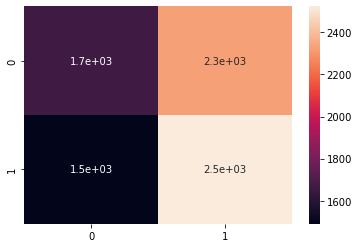

In [30]:
#heatmap of confusion matrix
cm=confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

# KNN

**Without Fine Tuning** 

In [5]:
#training the model
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#predict
pred_y = neigh.predict(X_test)

#confusion matrix
cm =confusion_matrix(y_test, pred_y)
print(cm)
print(classification_report(y_test, pred_y))



print('Accuracy: ',round(.score(X_test, y_test),3), '\n')
print('Precision: ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

[[3064  922]
 [1084 2930]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3986
           1       0.76      0.73      0.74      4014

    accuracy                           0.75      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.75      0.75      0.75      8000



In [8]:

mean_acc = np.zeros(20)

#Creating an array that contains accuracy scores for 1 to 20 neighbors
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)
    
#accuracy array
mean_acc

array([0.86175 , 0.7895  , 0.761125, 0.751375, 0.74925 , 0.742625,
       0.73675 , 0.72425 , 0.719375, 0.709125, 0.700875, 0.69425 ,
       0.687375, 0.68025 , 0.67475 , 0.6695  , 0.6595  , 0.658875,
       0.65175 , 0.655   ])

**Number of Neighbors v/s Accuracy**

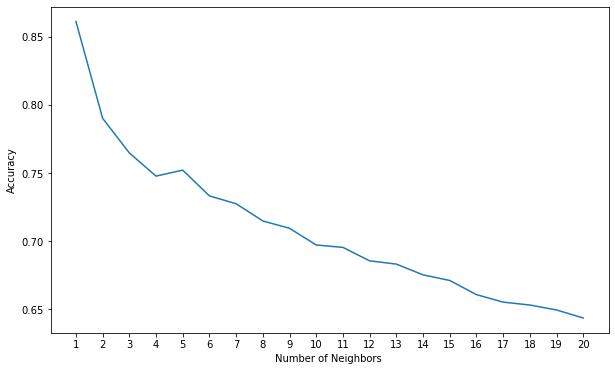

In [5]:
#plot
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

**After Hyperparameter Tuning :**

In [9]:
# your code

knn_params ={
    "n_neighbors":[3,5,7],
    "weights" : ["uniform","distance"],
    "metric" : ["euclidean", "manhattan", "minkowski"],
    
}

knn = KNeighborsClassifier()

#grid search

gs = GridSearchCV(KNeighborsClassifier(), knn_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [10]:
#Retrieving the best parameters
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [11]:
# substituting the best parameters
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3,
                     weights='distance')

In [12]:
# getting a prediction
y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3986
           1       0.88      0.85      0.87      4014

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



[[3504  482]
 [ 583 3431]]
Accuracy:  0.867 

Precision:  0.879 



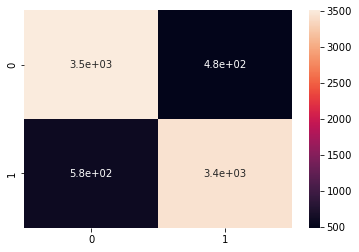

In [15]:
#heatmap of confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

print('Accuracy: ',round(.score(X_test, y_test),3), '\n')
print('Precision: ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

# Decision Tree


1. Decision Trees are non-linear classifiers, the missing values in the data do not affect the process of building a decision tree and also it handles skewed classes which suits well for our dataset which is a non-linear and has missing values.
2. Decision Tree was picked because, compared to other algorithms it requires less effort for data preparation during pre-processing and it is not necessary to normalize or scale the data. 
3. Moreover, decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.



**No Fine Tuning with entropy as criteria:**

In [40]:

#Defining decision tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#training the data
dtree.fit(X_train, y_train)

#testing the data
y_pred2 = dtree.predict(X_test)


# an evaluation of the model
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
#Confusion Matrix computation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy: ',round(dtree.score(X_test, y_test),3), '\n')
print('Precision: ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      3996
           1       0.81      0.72      0.76      4004

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000
 

Confusion Matrix: 
 [[3336  660]
 [1123 2881]] 

Accuracy:  0.753 

Precision:  0.835 



**No Fine Tuning with gini as criteria:**

In [25]:
# your code

#Defining decision tree classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

#training the data
dtree.fit(X_train, y_train)

#testing the data
y_pred2 = dtree.predict(X_test)


# an evaluation of the model
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
#Confusion Matrix computation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy: ',round(dtree.score(X_test, y_test),3), '\n')
print('Precision: ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      3986
           1       0.88      0.85      0.87      4014

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000
 

Confusion Matrix: 
 [[3503  483]
 [ 583 3431]] 

Accuracy:  0.743 

Precision:  0.879 



<AxesSubplot:>

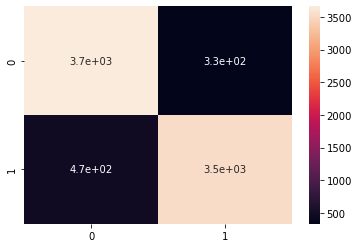

In [28]:
#heatmap of confusion matrix
cm=confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

[Text(0.5, 0.875, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 32000\nvalue = [16004, 15996]'),
 Text(0.25, 0.625, 'X[6] <= 33.5\nentropy = 0.896\nsamples = 20622\nvalue = [14180, 6442]'),
 Text(0.125, 0.375, 'X[14] <= 29.5\nentropy = 0.846\nsamples = 12053\nvalue = [8760, 3293]'),
 Text(0.0625, 0.125, 'entropy = 0.917\nsamples = 4923\nvalue = [3290, 1633]'),
 Text(0.1875, 0.125, 'entropy = 0.783\nsamples = 7130\nvalue = [5470, 1660]'),
 Text(0.375, 0.375, 'X[16] <= 0.639\nentropy = 0.949\nsamples = 8569\nvalue = [5420, 3149]'),
 Text(0.3125, 0.125, 'entropy = 0.933\nsamples = 7971\nvalue = [5194, 2777]'),
 Text(0.4375, 0.125, 'entropy = 0.957\nsamples = 598\nvalue = [226, 372]'),
 Text(0.75, 0.625, 'X[18] <= 0.239\nentropy = 0.635\nsamples = 11378\nvalue = [1824, 9554]'),
 Text(0.625, 0.375, 'X[14] <= 24.5\nentropy = 0.942\nsamples = 2570\nvalue = [922, 1648]'),
 Text(0.5625, 0.125, 'entropy = 0.942\nsamples = 312\nvalue = [200, 112]'),
 Text(0.6875, 0.125, 'entropy = 0.904\nsamples = 2258\

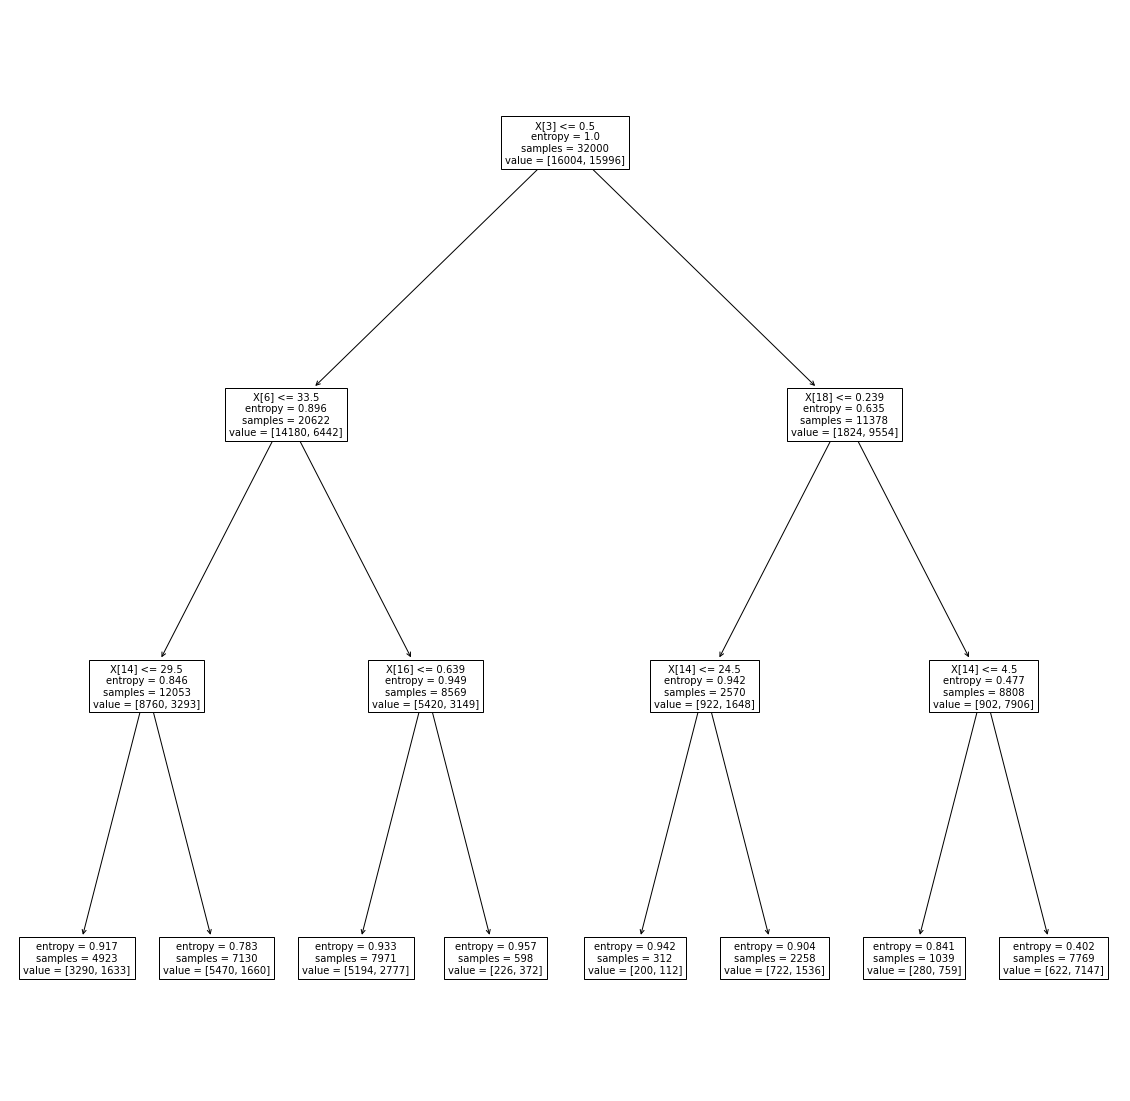

In [29]:
#plotting decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,fontsize=10)

**Fine Tuning 1: max_depths**

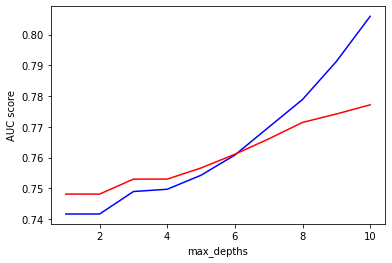

In [38]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = DecisionTreeClassifier(max_depth=int(max_depth))
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
line1 = plt.plot(max_depths, train_results, 'b' , label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r' , label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

**Decision Tree after applying tuning parameter**

In [41]:
# your code

#Defining decision tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

#training the data
dtree.fit(X_train, y_train)

#testing the data
y_pred2 = dtree.predict(X_test)


# an evaluation of the model
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
#Confusion Matrix computation
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy: ',round(dtree.score(X_test, y_test),3), '\n')
print('Precision: ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      3996
           1       0.81      0.72      0.76      4004

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000
 

Confusion Matrix: 
 [[3336  660]
 [1123 2881]] 

Accuracy:  0.779 

Precision:  0.835 



Disadvantages:
1. Decision Trees are instable because a small change in the data can cause a large change in the structure of the decision tree.
2. For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
3. Decision tree often involves higher time to train the model.
4. The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

# Gradient Boosted Tree

**No fine Tuning:**

Evaluation
Report: 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78      3986
           1       0.84      0.62      0.71      4014

    accuracy                           0.75      8000
   macro avg       0.77      0.75      0.75      8000
weighted avg       0.77      0.75      0.75      8000
 

Confusion Matrix: 
 [[3522  464]
 [1531 2483]] 

Accuracy (from score function):  0.751 

Precision (from confusion matrix):  0.884 



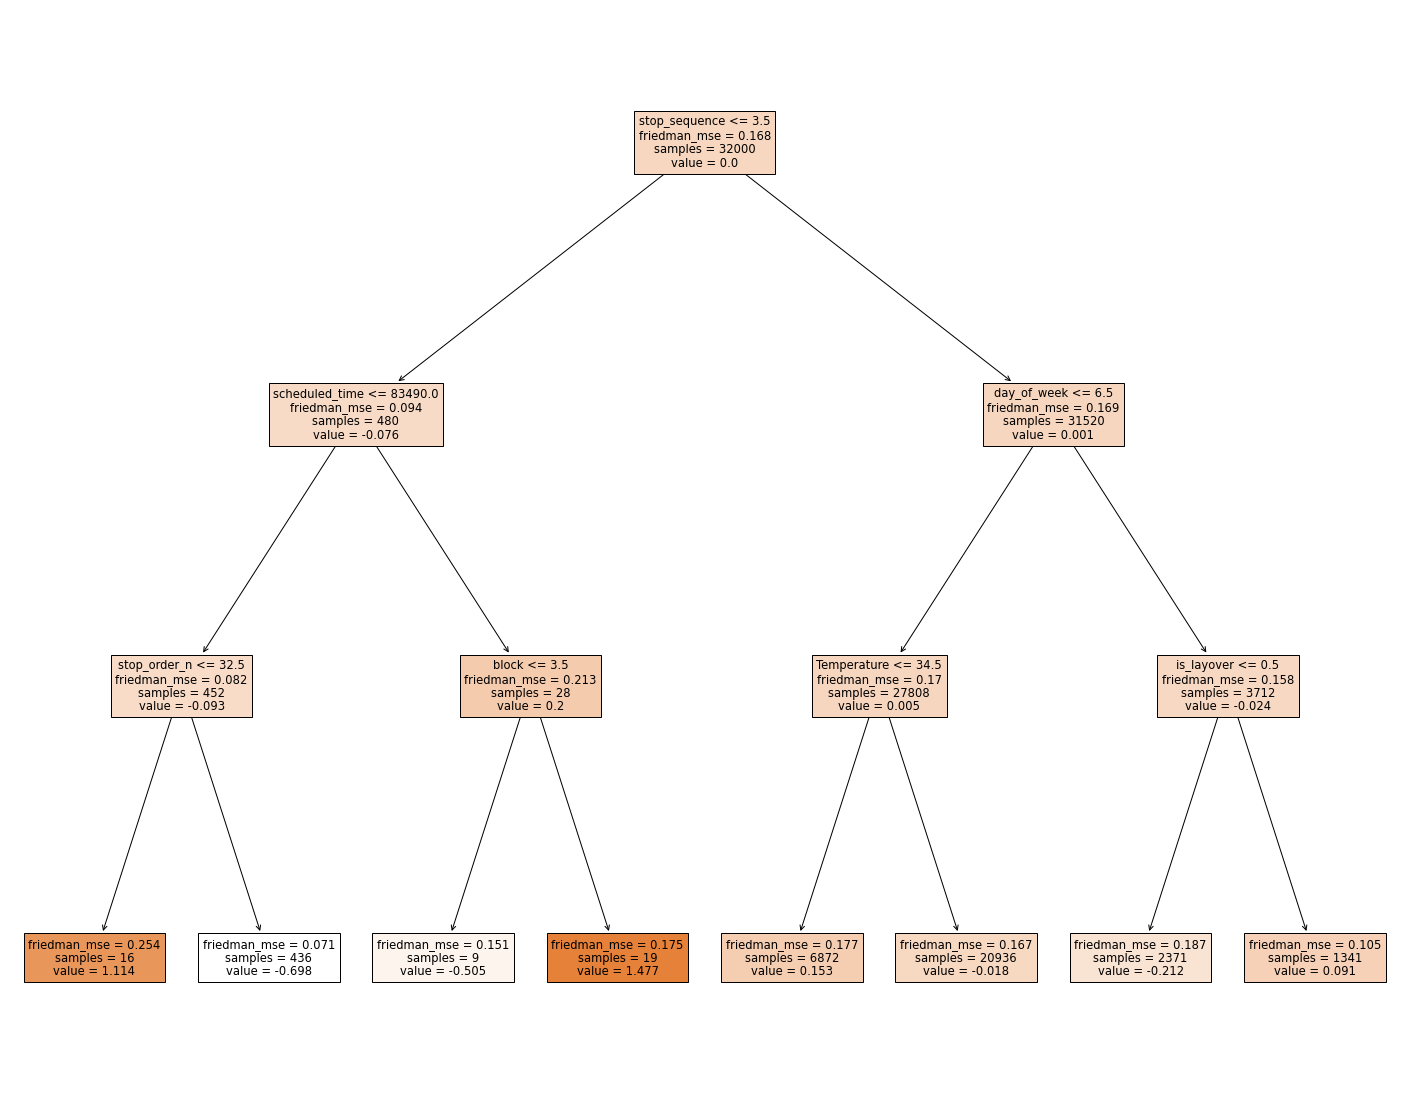

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

#Predict
y_pred = gb_model.predict(X_test)

#Evaluation
print('Evaluation')
print('Report: \n',classification_report(y_test,y_pred), '\n')
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n' , cm, '\n')
print('Accuracy (from score function): ',round(gb_model.score(X_test, y_test),3), '\n')
print('Precision (from confusion matrix): ',round(cm[0,0]/(cm[0,1]+cm[0,0]),3), '\n')

#Plotting
sub_tree_42 = gb_model.estimators_[42, 0] #plot tree number 42

fig = plt.figure(figsize=(25,20))
Activity=["0", "1"]
features_names=['day_of_week', 'scheduled_time', 'block', 'is_layover', 'Temperature',
        'direction_id', 'stop_sequence', 'geo_nodes',
       'minimum_clearance', 'segment_length', 'hausdorff_distance',
       'station_n', 'stop_order_n', 'vehicle_num_n', 'route_n', 'x_start',
       'x_end', 'y_start', 'y_end']

tree.plot_tree(sub_tree_42, feature_names=features_names, class_names = Activity, filled = True)
plt.show()





**Fine Tuning 1:**

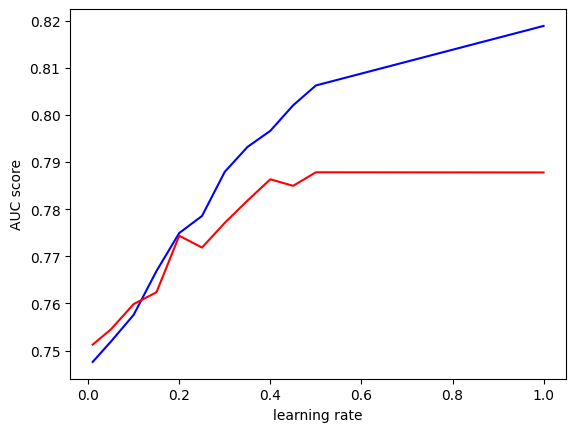

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [ 1, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
line1 = plt.plot(learning_rates, train_results, 'b' , label='Train AUC')
line2 = plt.plot(learning_rates, test_results, 'r' , label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

**Fine Tuning 2:**

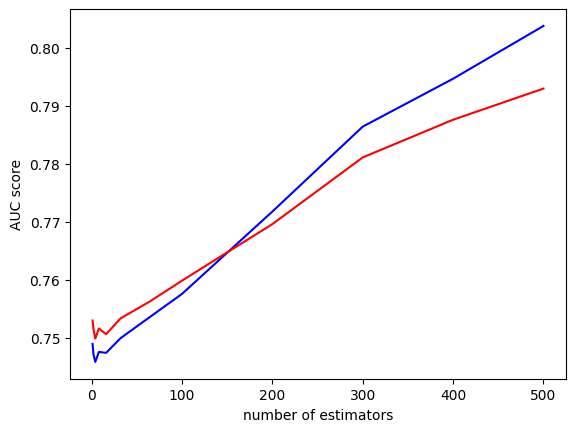

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
train_results = []
test_results = []
for n in n_estimators:
   model = GradientBoostingClassifier(n_estimators=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
line1 = plt.plot(n_estimators, train_results, 'b' , label='Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r' , label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('number of estimators')
plt.show()

**Fine Tuning 3:** Taking So long, maybe removed!

In [37]:
#max_depths = np.linspace(1, 32, 32, endpoint=True)
#train_results = []
#test_results = []
#for max_depth in max_depths:
   #model = GradientBoostingClassifier(max_depth=int(max_depth))
   #model.fit(X_train, y_train)
   #train_pred = model.predict(X_train)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   #train_results.append(roc_auc)
   #y_pred = model.predict(X_test)
   #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   #roc_auc = auc(false_positive_rate, true_positive_rate)
   #test_results.append(roc_auc)
   
#line1 = plt.plot(max_depths, train_results, 'b' , label='Train AUC')
#line2 = plt.plot(max_depths, test_results, 'r' , label='Test AUC')
#plt.ylabel('AUC score')
#plt.xlabel('max_depths')
#plt.show()

**Fine Tuning 4:**

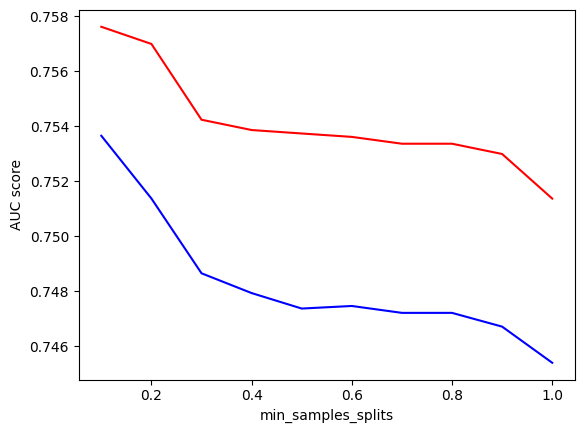

In [34]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
line1 = plt.plot(min_samples_splits, train_results, 'b' , label='Train AUC')
line2 = plt.plot(min_samples_splits, test_results, 'r' , label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

**Fine Tuning 5:**

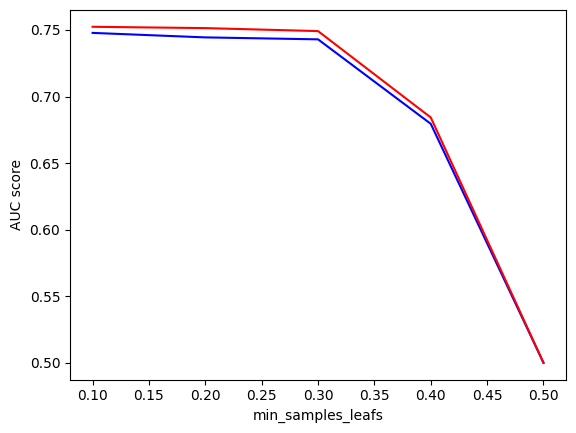

In [35]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
line1 = plt.plot(min_samples_leafs, train_results, 'b' , label='Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r' , label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

<AxesSubplot:>

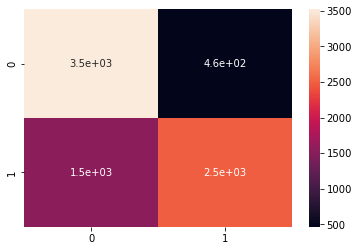

In [10]:
#heatmap of confusion matrix
cm=confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)